<a href="https://colab.research.google.com/github/kunalkushwahatg/wine_quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from torchsummary import summary

In [126]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2024-02-07 08:57:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv.1’

winequality-white.c     [ <=>                ] 258.23K  --.-KB/s    in 0.1s    

2024-02-07 08:57:23 (2.30 MB/s) - ‘winequality-white.csv.1’ saved [264426]



In [127]:
#read the dataset
df = pd.read_csv("/content/winequality-white.csv",sep=";")
df.head(200)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.4,0.30,0.45,3.5,0.197,76.0,180.0,0.9942,3.02,0.39,9.1,6
196,6.4,0.29,0.44,3.6,0.197,75.0,183.0,0.9942,3.01,0.38,9.1,5
197,6.8,0.26,0.24,7.8,0.052,54.0,214.0,0.9961,3.13,0.47,8.9,5
198,7.1,0.32,0.24,13.1,0.050,52.0,204.0,0.9980,3.10,0.49,8.8,5


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [129]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Dataset conatins 11 features and one label

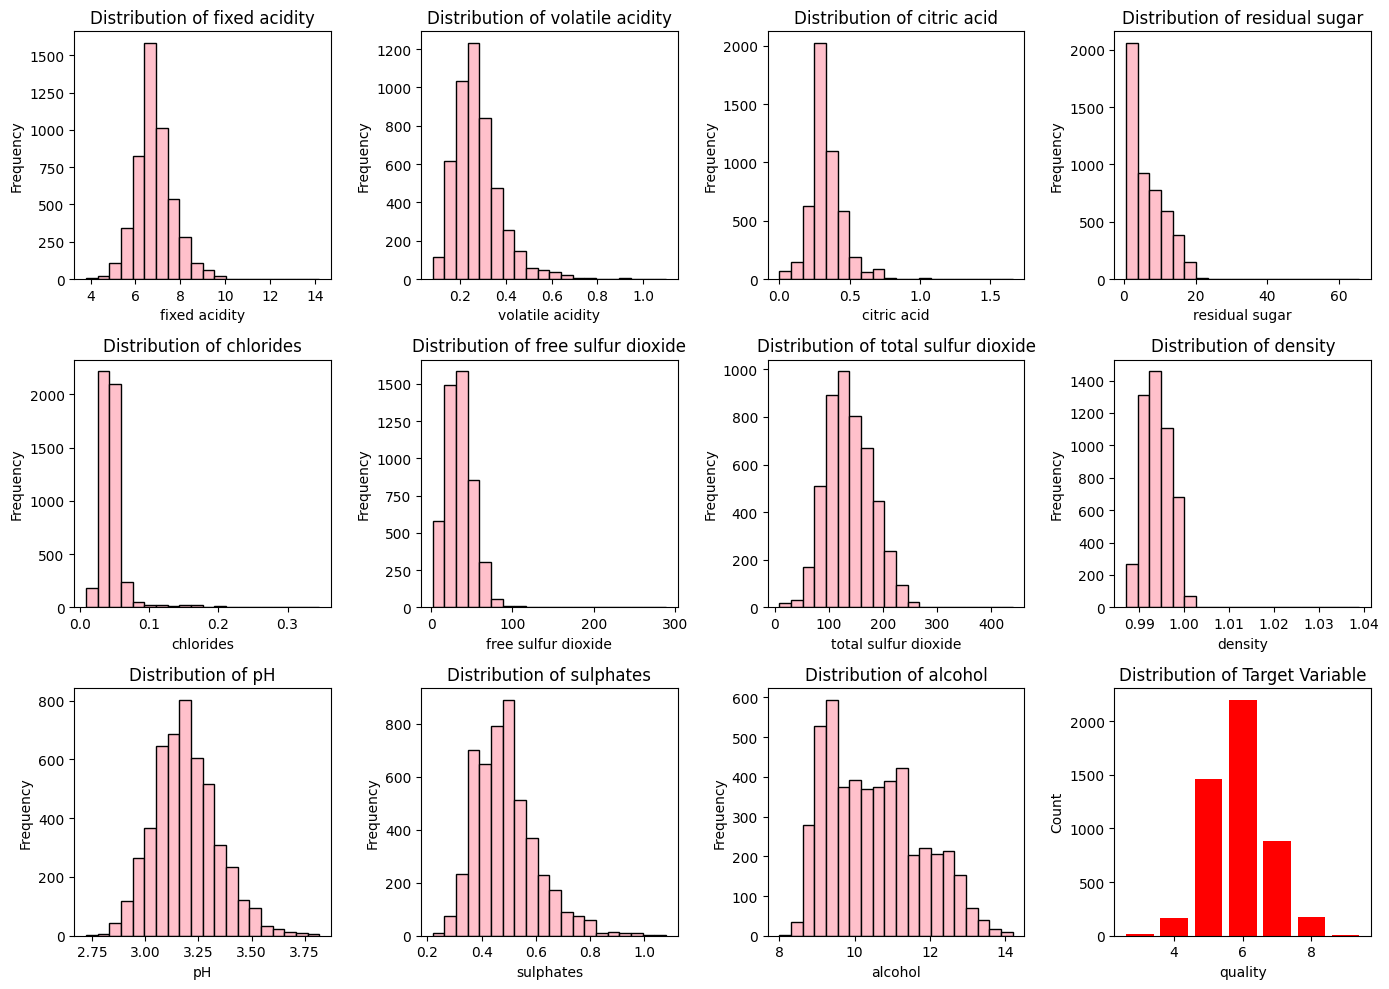

In [130]:

'''plotting of every dataset every feature and label on a (frequency vs value )'''


plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    plt.hist(df[column], bins=20, edgecolor='black',color='pink')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.subplot(3, 4, 12)
plt.bar(df['quality'].unique(), df['quality'].value_counts(), color='red')
plt.title('Distribution of Target Variable')
plt.xlabel('quality')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [131]:

x = df.drop('quality', axis=1).values
y = df['quality'].values


#standardize the values (mean=0 , std=1) to reduce spread of dataset
scaler = StandardScaler()
X = scaler.fit_transform(x)

#converts dataset to float type torch tensor
x_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [141]:
print("before standardization")
print(x[0])
print("after standardization")
print(X[0])

before standardization
[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
 1.001e+00 3.000e+00 4.500e-01 8.800e+00]
after standardization
[ 0.17209696 -0.0817699   0.2132802   2.82134917 -0.035355    0.56993158
  0.74456503  2.33151201 -1.24692128 -0.34918426 -1.39315246]


In [142]:
#both x,y are 2d tensor
x_tensor.shape  , y_tensor.shape

(torch.Size([4898, 11]), torch.Size([4898, 1]))

In [146]:
#parameters
BATCH_SIZE = 64
lr = 0.0008
input_size = x.shape[1]
dropout_prob = 0.3

In [135]:

#split 20% of dataset for evaluation purpose
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2)

#tensor data is converted to TensorDataset class for further working with Dataloader
train_ds = TensorDataset(x_train, y_train)


train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)


In [148]:
'''model 1 '''

class neuralNetworkModel1(nn.Module):
    '''simple 1 linear layer model '''
    def __init__(self, input_size):
        super(neuralNetworkModel1, self).__init__()
        self.l1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.tanh1 = nn.Tanh()
        self.l2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.tanh2 = nn.Tanh()
        self.l3 = nn.Linear(64, 1)



    def forward(self, x):
        out = self.dropout1(self.l1(x))
        out = self.tanh1(out)
        out = self.dropout2(self.l2(out))
        out = self.tanh2(out)
        out = self.l3(out)
        return out

model = neuralNetworkModel1(input_size)
summary(model,(input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           1,536
           Dropout-2                  [-1, 128]               0
              Tanh-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
           Dropout-5                   [-1, 64]               0
              Tanh-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [149]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

''' only adam optimizer performed well '''
#optimizer = optim.RMSprop(model.parameters(), lr=0.01)
#optimizer = optim.SGD(model.parameters(), lr=lr)

' only adam optimizer performed well '

In [150]:
num_epochs = 200


def eval():
    with torch.no_grad():
        model.eval()
        y_pred = model(x_test)
        val_loss = criterion(y_pred, y_test)
        print(f'Val Loss: {val_loss.item()}')
        return val_loss.item()

train_loss = []
val_loss  = []
for epoch in range(num_epochs):
    losses = []
    for inputs, targets in train_dl:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch%20 == 0 and epoch != 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, \nLoss: {sum(losses)/len(losses)}')
        val_loss.append(eval())
        train_loss.append(sum(losses)/len(losses))

Epoch 21/200, 
Loss: 0.8160898651807539
Val Loss: 4.347418785095215
Epoch 41/200, 
Loss: 0.4914544215125422
Val Loss: 0.4850388765335083
Epoch 61/200, 
Loss: 0.46284109402087426
Val Loss: 0.47476625442504883
Epoch 81/200, 
Loss: 0.4469439464230691
Val Loss: 0.4748571217060089
Epoch 101/200, 
Loss: 0.420187977052504
Val Loss: 0.457256555557251
Epoch 121/200, 
Loss: 0.40182713755676824
Val Loss: 0.46323662996292114
Epoch 141/200, 
Loss: 0.3794888469480699
Val Loss: 0.4804854989051819
Epoch 161/200, 
Loss: 0.35223286382613644
Val Loss: 0.4744943082332611
Epoch 181/200, 
Loss: 0.33614979708387005
Val Loss: 0.47373148798942566


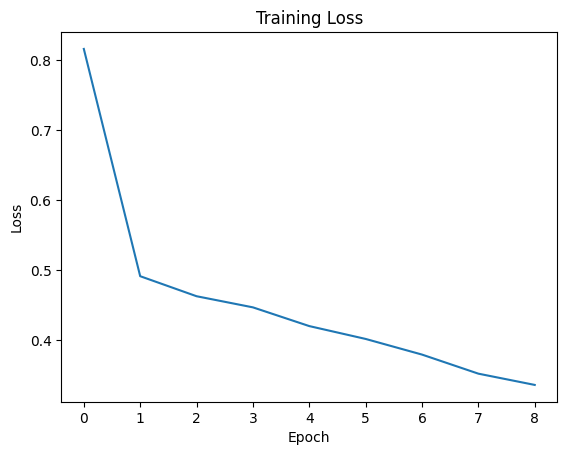

In [151]:
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

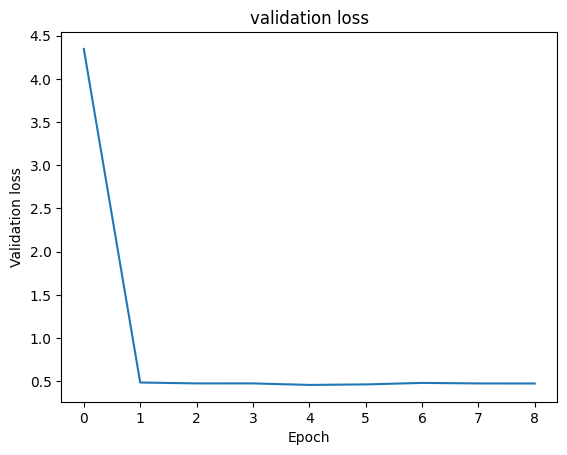

In [152]:

plt.plot(val_loss)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.title('validation loss')
plt.show()